In [115]:
from pathlib import Path
from tqdm.notebook import tqdm
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

def is_predecessor(a,b,max_overlap=17):
    "returns the overlap amount if a is a predecessor of b; -1 otherwise"
    min_i = max(0,max_overlap-len(a))
    for i in range(len(a)):
        if b.startswith(a[i:]):
            return len(a)-i
    return -1

def path_overlaps(path):
    overlaps = np.zeros(len(path)-1,dtype=int)
    for i in range(len(path)-1):
        overlaps[i] = is_predecessor(path[i],path[i+1])
    return overlaps

def assemble_path_printer(path):
    overlaps = path_overlaps(path)
    s = path[0]
    o_acc = 0
    print(path[0])
    for i in range(len(path)-1):
        o = overlaps[i]
        o_acc += len(path[i])-o
        print(" "*o_acc+path[i+1])
        s += path[i+1][o:]
    print(s)
    return s

def assemble_path(path):
    overlaps = path_overlaps(path)
    s = path[0]
    for i in range(len(path)-1):
        o = overlaps[i]
        s += path[i+1][o:]
    return s

# Test

In [110]:
path = Path("path_6.txt").read_text().split()
assemble_path_printer(path);

TATACTGAATTTGCAG
           TGCAGGACCTGATATA
                    TGATATAAATTCCTT
                              TCCTTGTCGTAGACGA
                                         GACGAGGTTGTGGCCC
                                                    GGCCCTGATGCGCTC
                                                              CGCTCTATATCCTCG
                                                                        CCTCGAGCGTCGCCAGC
                                                                                   GCCAGCTTCTTCGTGC
                                                                                             TCGTGCTCGACCGCC
TATACTGAATTTGCAGGACCTGATATAAATTCCTTGTCGTAGACGAGGTTGTGGCCCTGATGCGCTCTATATCCTCGAGCGTCGCCAGCTTCTTCGTGCTCGACCGCC


# export contigs

In [119]:
for path_filename in glob("path_*.txt"):
    path = Path(path_filename).read_text().split()
    contig = assemble_path(path)
    with open(path_filename.replace(".txt","")+"_contig.txt","w") as contig_file:
        contig_file.write(contig)

Text(0, 0.5, 'Frequencies')

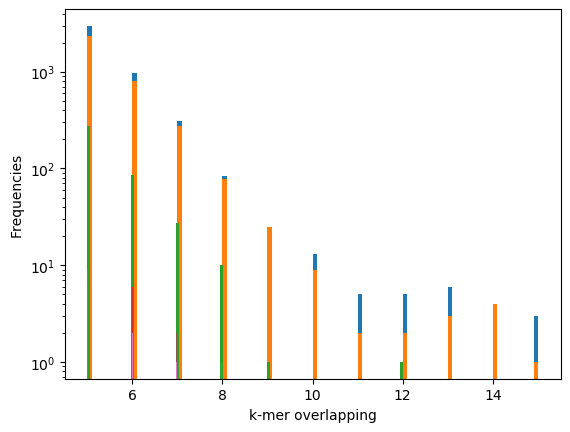

In [139]:
path0 = Path("path_0.txt").read_text().split()
path1 = Path("path_1.txt").read_text().split()
path2 = Path("path_2.txt").read_text().split()
path3 = Path("path_3.txt").read_text().split()
path4 = Path("path_4.txt").read_text().split()
path5 = Path("path_5.txt").read_text().split()
path6 = Path("path_6.txt").read_text().split()
path7 = Path("path_7.txt").read_text().split()

plt.hist(path_overlaps(path0),100,log=True);
plt.hist(path_overlaps(path1),100,log=True);
plt.hist(path_overlaps(path2),100,log=True);
plt.hist(path_overlaps(path3),100,log=True);
plt.hist(path_overlaps(path4),100,log=True);
plt.hist(path_overlaps(path5),100,log=True);
plt.hist(path_overlaps(path6),100,log=True);
plt.hist(path_overlaps(path7),100,log=True);
plt.xlabel("k-mer overlapping")
plt.ylabel("Frequencies")

In [46]:
%time reduce(pair_overlap,path)

KeyboardInterrupt: 

In [7]:
a,b = 'GAGTGTTTCTAAAATT', 'AAAATTAAATTTCTA'
overlap = is_predecessor(a,b)

In [18]:
print(a+"\n          "+b)
print(a[:-overlap]+b)

GAGTGTTTCTAAAATT
          AAAATTAAATTTCTA
GAGTGTTTCTAAAATTAAATTTCTA


'AAAATTAAATTTCTA'